In [53]:
import pandas as pd
import matplotlib.pyplot as plt

## Data cleaning

In [54]:
df = pd.read_csv('./data.csv', usecols=['date', 'title', 'type', 'numeric_values'])
df['numeric_values'] = df['numeric_values'].str.replace('.',':')
df['datetime'] = df['date'].astype(str) + " " + df['numeric_values']
df = df[df['title'] != 'No record']
df['date'] = pd.to_datetime(df['datetime'])
df.drop(['numeric_values', 'datetime'],axis=1, inplace=True)

keywords = ['Amber', 'Red', 'Black', 'Cancellation']

def determine_type(title):
    for keyword in keywords:
        if keyword in title:
            return keyword
    return None

df['type'] = df['title'].apply(determine_type)
df = df.sort_values('date').reset_index(drop=True)
df['duration'] = df['date'].diff().fillna(pd.Timedelta(seconds=0)).dt.total_seconds() / 3600  # Convert to hours

# Iterate through the DataFrame to find amber warnings and their cancellations
for i in range(len(df) - 1):
    if df.loc[i, 'type'] == 'Amber':
        df.loc[i, 'duration'] = df.loc[i+1, 'duration'] 

df = df[df['type'] != 'Cancellation']
df.drop('title', axis=1, inplace=True)
# df.to_csv('./data1.csv', index=False)

C:\Users\chanttsh\AppData\Local\Temp\ipykernel_1248\1835456676.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['datetime'])


## Plot: Count of warnings, by months

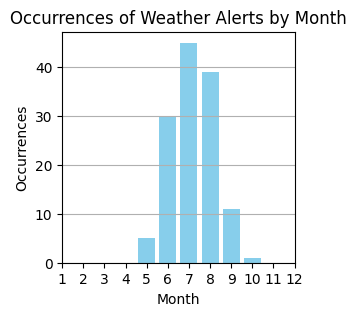

In [58]:
df['month'] = df['date'].dt.month
df1 = df.groupby(['month', 'type']).size().reset_index(name='occurrences')
plt.figure(figsize=(3,3))
plt.bar(df1['month'], df1['occurrences'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Occurrences')
plt.title('Occurrences of Weather Alerts by Month')
plt.xticks(range(1, 13))  # Assuming months from January (1) to December (12)
plt.grid(axis='y')

## Plot: Count of warnings, by hours

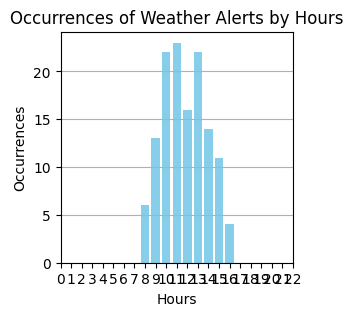

In [59]:
df['hours'] = df['date'].dt.hour
df_by_hour = df.groupby(['hours', 'type']).size().reset_index(name='occurrences')

plt.figure(figsize=(3,3))
plt.bar(df_by_hour['hours'], df_by_hour['occurrences'], color='skyblue')
plt.xlabel('Hours')
plt.ylabel('Occurrences')
plt.title('Occurrences of Weather Alerts by Hours')
plt.xticks(range(0, 23))
plt.grid(axis='y')

## Plot: Sum of warning durations, by months

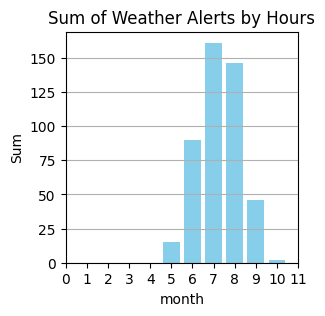

In [64]:
df1 = df.groupby('month').sum('duration').reset_index()
plt.figure(figsize=(3,3))
plt.bar(df1['month'], df1['duration'], color='skyblue')
plt.xlabel('month')
plt.ylabel('Sum')
plt.title('Sum of Weather Alerts by Hours')
plt.xticks(range(0, 12))
plt.grid(axis='y')